In [216]:
import pandas as pd 
import matplotlib.pylab as plt
import numpy as np
import pickle
import re
from aux_func import get_title

In [217]:
# nltk para extraer stopwords 
import nltk 
#nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('spanish')

In [218]:
with open("postTexts2707", "rb") as fp:   
    posts = pickle.load(fp)

df = pd.DataFrame(posts,columns =['full_text'])

In [219]:
# drop algunos posts problematicos.
df.drop([178,404,506,2695,1125], inplace=True)
df.reset_index(inplace=True, drop=True)

In [220]:
# Creo columna con titulos, y con cuerpo sin titulo
df['title'] = df['full_text'].apply(lambda post: get_title(post))
df['body'] = df['full_text'].apply(lambda post: post[len(get_title(post)):])

In [221]:
df.tail()

,full_text,title,body
2697,"LA POESÍA, SEGÚN #CAPUSOTTO\n\nPresentó su lib...","LA POESÍA, SEGÚN #CAPUSOTTO","\n\nPresentó su libro ""Lo que teme la noche"" e..."
2698,"#SPINETTA: HAY QUE LLEGAR AL ALMA\n""A veces si...","#SPINETTA: HAY QUE LLEGAR AL ALMA ""A",veces siento que la calidad no vende. Odio es...
2699,A NICOLÁS LO MATARON LOS AGROTÓXICOS\n(El agro...,A NICOLÁS LO MATARON LOS AGROTÓXICOS,\n(El agropatrón Ricardo Prieto fue sentenciad...
2700,"LEER, A PESAR DE TODO\n(Sobre una foto del #Ch...","LEER, A PESAR DE TODO","\n(Sobre una foto del #Che, en la selva bolivi..."
2701,"#AbortoLegal. ""NO, NO ESTÁ BIEN, ESTÁ MAL""\n(P...",,"#AbortoLegal. ""NO, NO ESTÁ BIEN, ESTÁ MAL""\n(P..."


In [235]:
# Creo lista de palabras sin simbolos ni stopwords
posts_sin_symb = re.sub('\?|\¿|\.|\!|\¡|\/|\;|\:|\(|\)|\"|\,|\”|\”|\“|\'|\*|\-|\–|\—|\…|\\u2063|\# ', '', " ".join(posts))
posts_sin_symb = re.sub('\n|\r| \‘|\’' , ' ', posts_sin_symb)
posts_sin_symb = re.sub('👉' , '👉 ', posts_sin_symb)
posts_sin_symb = re.sub('📷' , '📷 ', posts_sin_symb)
posts_sin_symb = re.sub('🥳' , '🥳 ', posts_sin_symb)
#posts_sin_symb

In [238]:
words_list_lower = posts_sin_symb.lower().split()
words_set = sorted(set(words_list_lower))
words_set_sin_stopwords = [word for word in words_set if not word in stopwords]
n_to_word = {n:word for n, word in enumerate(words_set_sin_stopwords)}
word_to_n = {word:n for n, word in enumerate(words_set_sin_stopwords)}

# GUARDA TARDA ~15min 
word_count_dict = {i:words_list_lower.count(i) for i in words_set_sin_stopwords}
#word_count_dict

(-0.5, 1199.5, 799.5, -0.5)

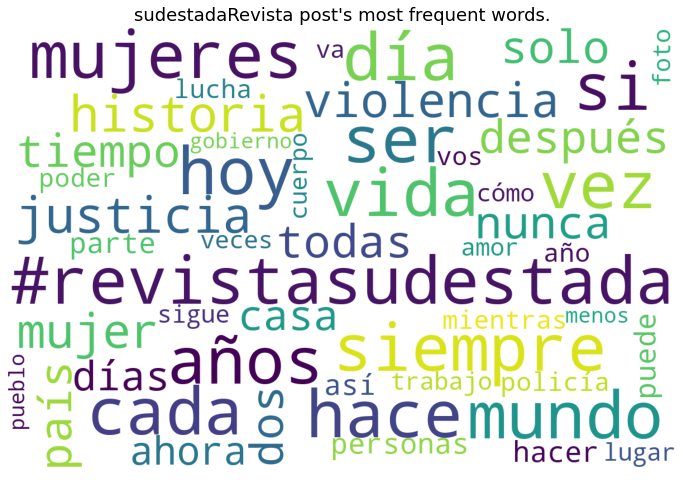

In [260]:
from wordcloud import WordCloud
wc_atributos = {'height' : 800,
                'width' : 1200,
                'background_color' : 'white',
                'max_words' : 50,
                'relative_scaling':0
                } # Defino los parámetros que les voy a pasar a los wordclouds

fig, axs = plt.subplots(1, 1, figsize = (12,10))

wc = WordCloud(**wc_atributos).generate_from_frequencies(word_count_dict)

axs.set_title('sudestadaRevista post\'s most frequent words.', fontsize=18)
axs.imshow(wc)
axs.axis('off')

In [267]:
wc.to_file('./plots/wordclowd-2707.png')